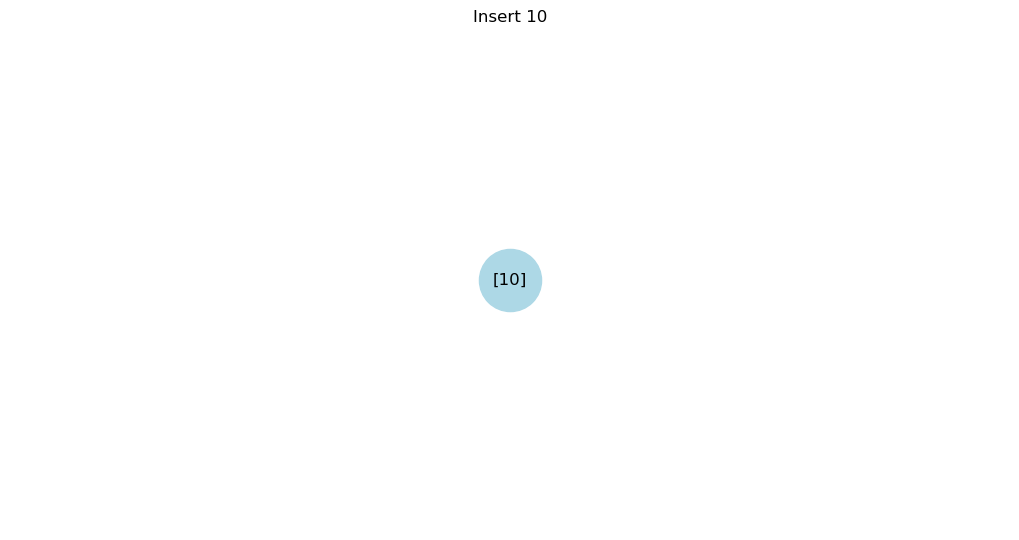

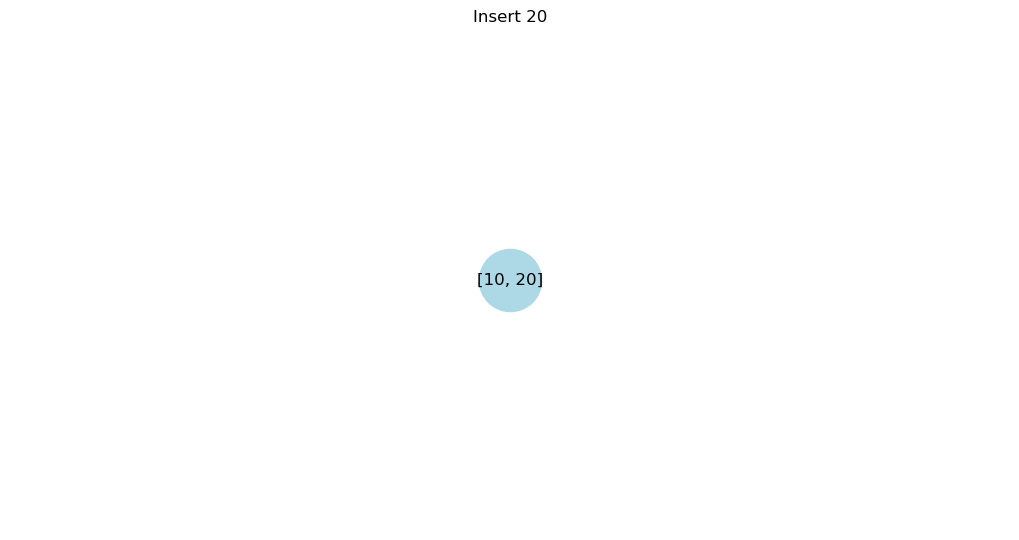

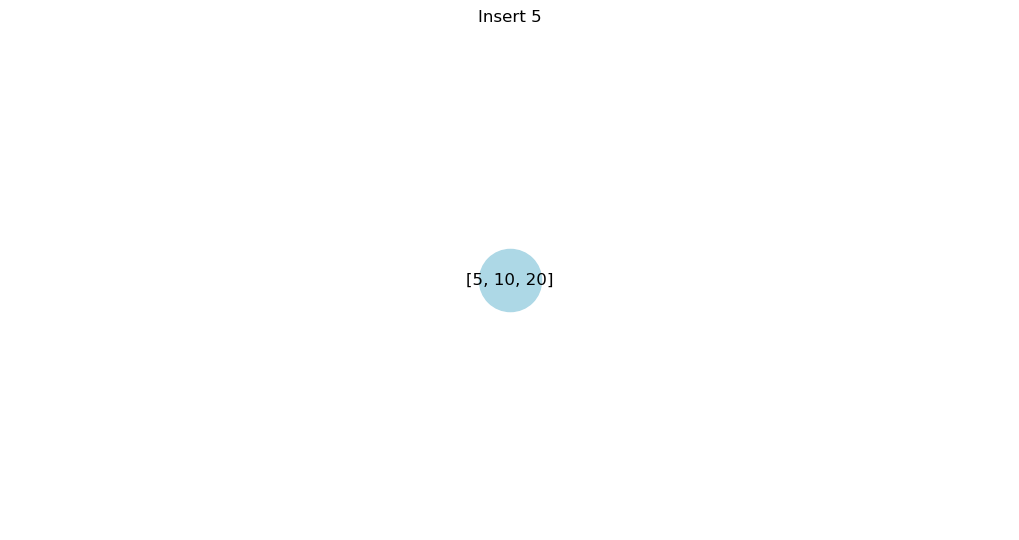

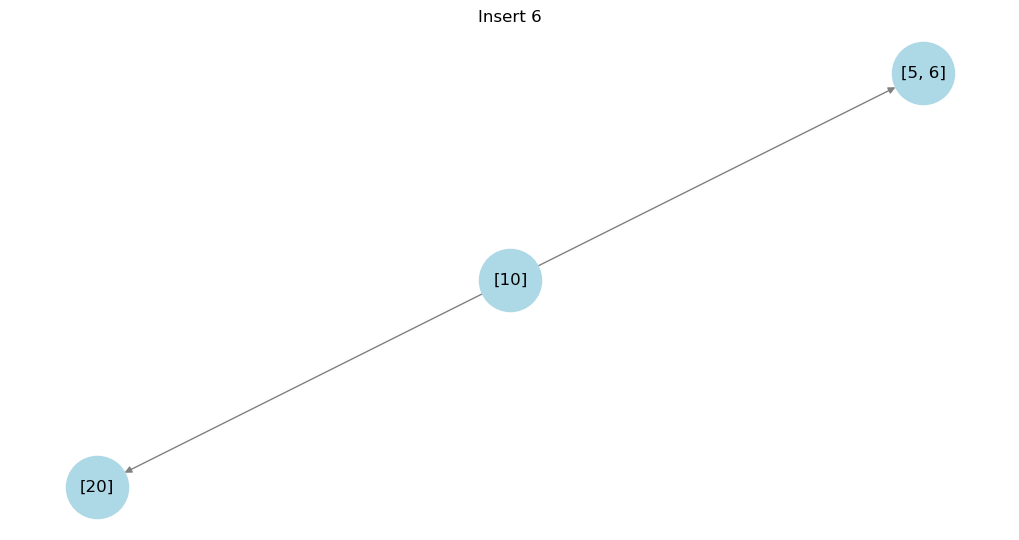

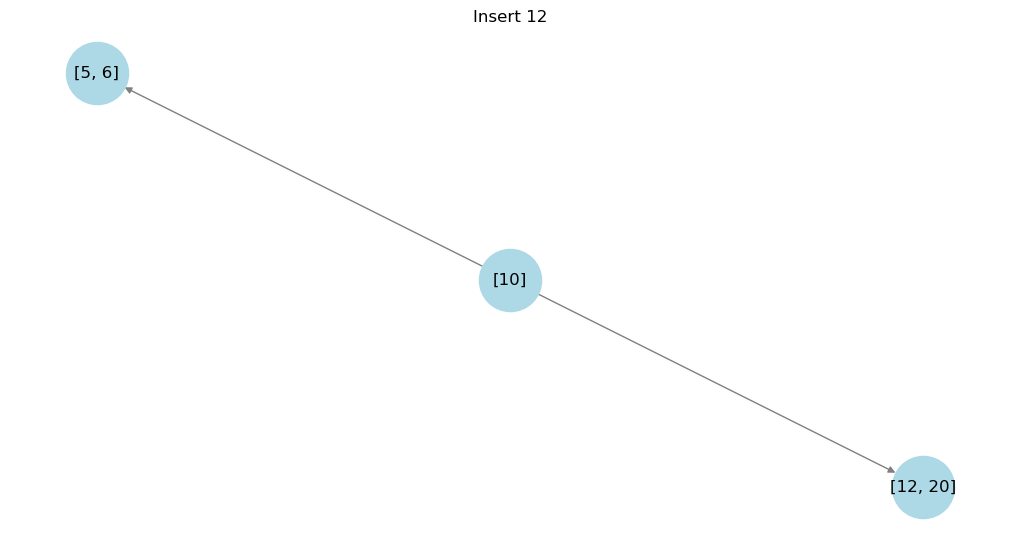

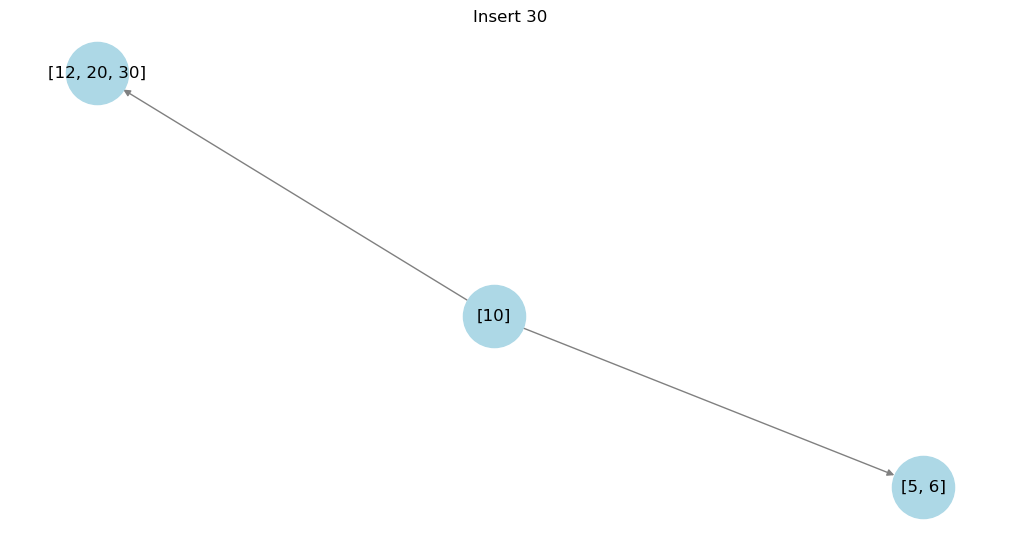

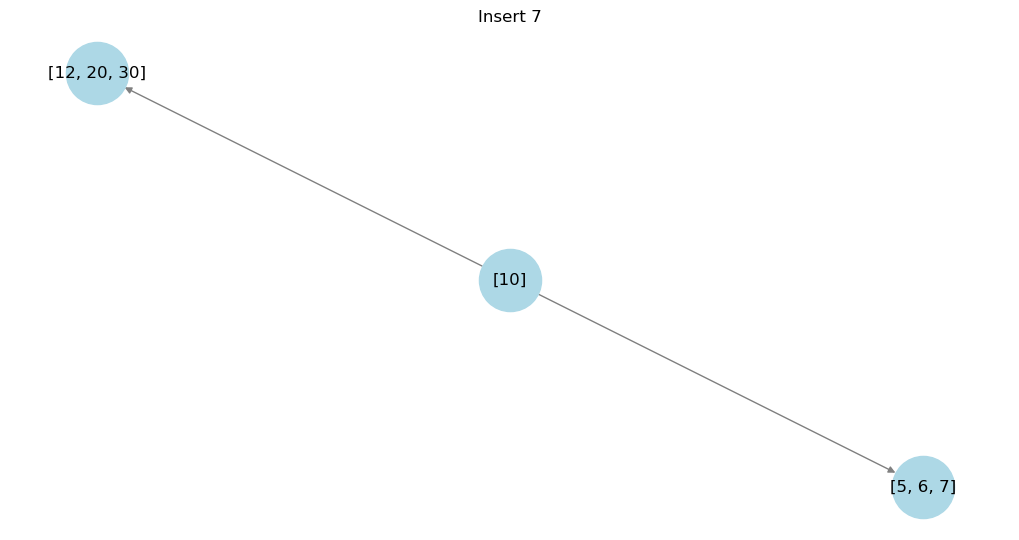

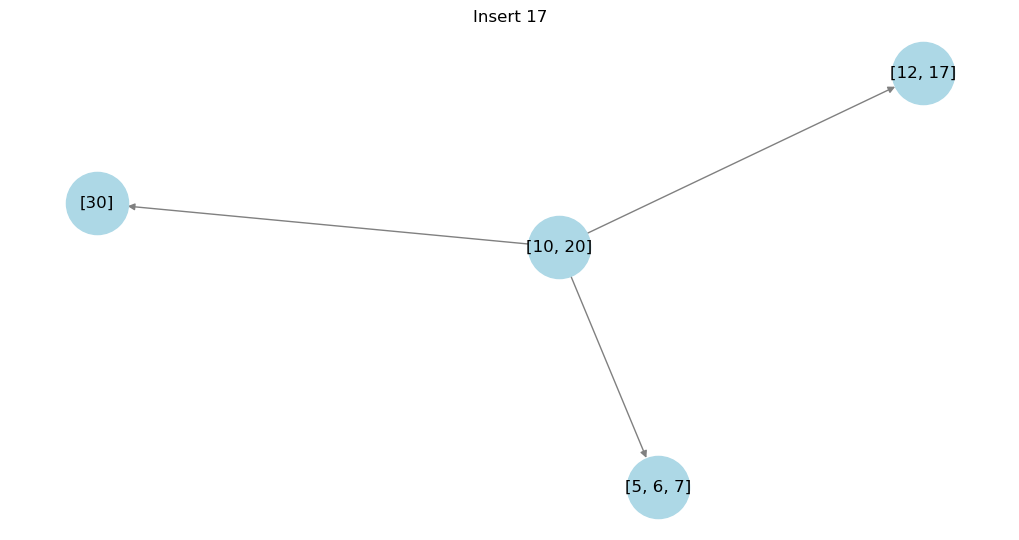

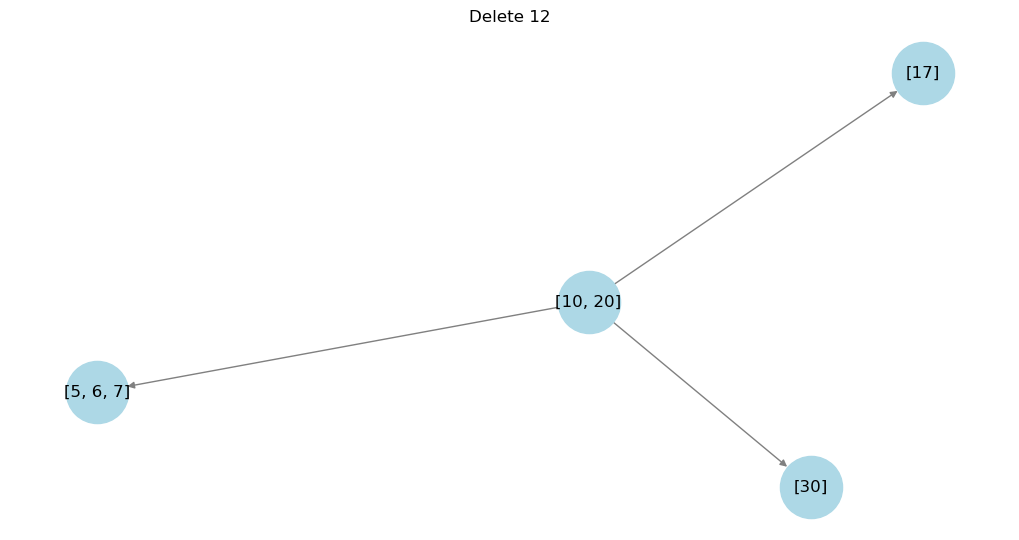

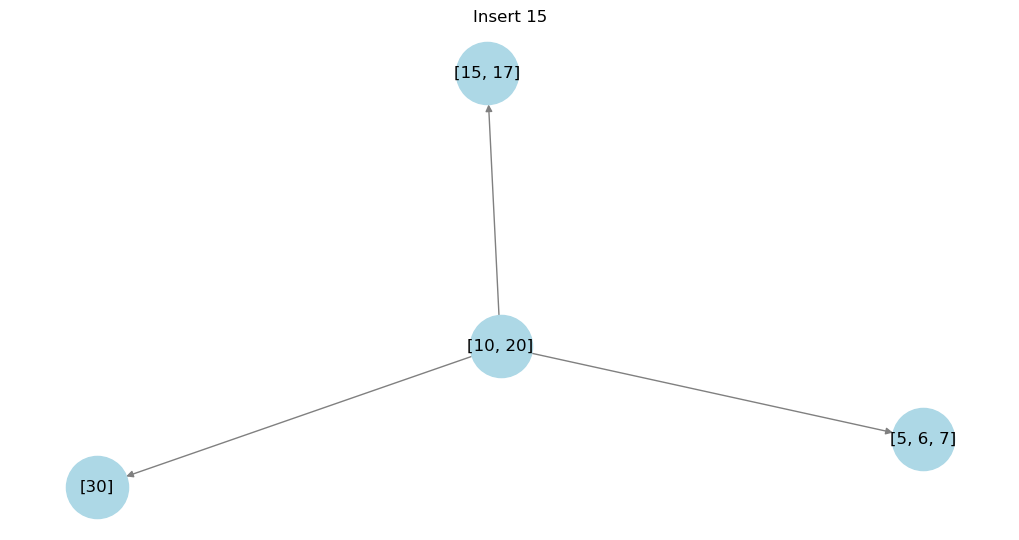

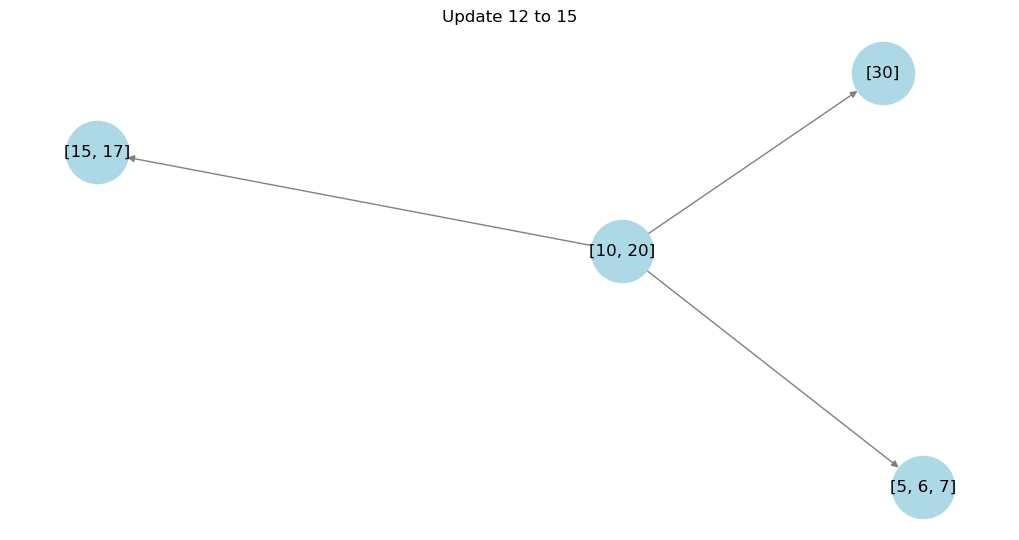

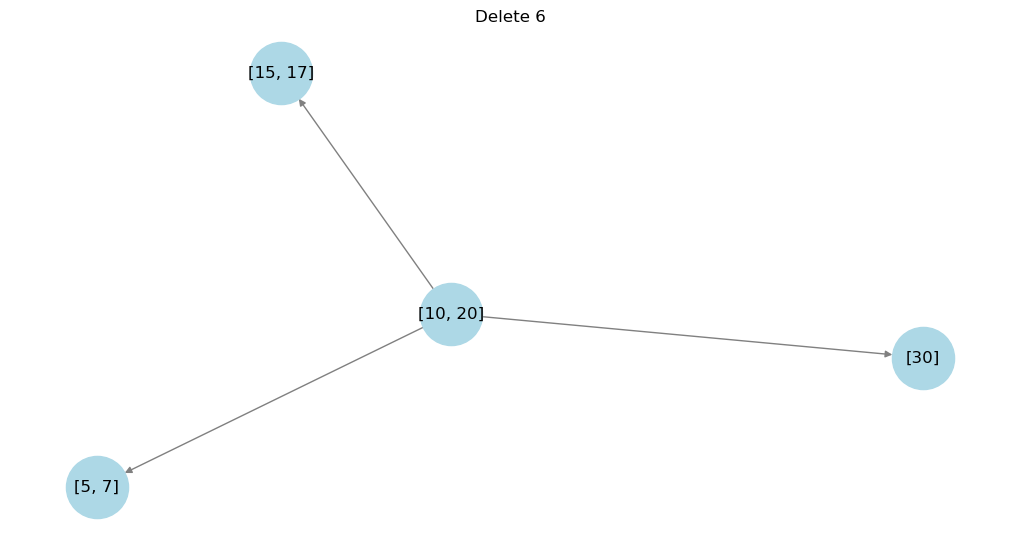

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# B-tree Node class
class BTreeNode:
    def __init__(self, t, leaf=False):
        self.t = t  # Minimum degree (defines range for number of keys)
        self.leaf = leaf  # True if leaf node
        self.keys = []  # List of keys
        self.children = []  # List of child pointers

# B-tree class
class BTree:
    def __init__(self, t):
        self.root = BTreeNode(t, True)
        self.t = t

    def traverse(self, node, G, parent=None):
        """Helper function for visualization."""
        node_id = id(node)
        G.add_node(node_id, label=str(node.keys))
        if parent:
            G.add_edge(parent, node_id)
        for child in node.children:
            self.traverse(child, G, node_id)

    def visualize(self, title="B-Tree Visualization"):
        """Visualize the B-tree using NetworkX."""
        G = nx.DiGraph()
        self.traverse(self.root, G)
        pos = nx.spring_layout(G)
        labels = {node: G.nodes[node]['label'] for node in G.nodes}
        plt.figure(figsize=(10, 5))
        nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', edge_color='gray', node_size=2000)
        plt.title(title)
        plt.show()

    def insert(self, k):
        """Inserts a new key k in the B-tree."""
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            new_node = BTreeNode(self.t, False)
            new_node.children.append(self.root)
            self.split_child(new_node, 0)
            self.root = new_node
        self._insert_non_full(self.root, k)
        self.visualize(f"Insert {k}")

    def _insert_non_full(self, node, k):
        if node.leaf:
            node.keys.append(k)
            node.keys.sort()
        else:
            i = len(node.keys) - 1
            while i >= 0 and k < node.keys[i]:
                i -= 1
            i += 1
            if len(node.children[i].keys) == (2 * self.t) - 1:
                self.split_child(node, i)
                if k > node.keys[i]:
                    i += 1
            self._insert_non_full(node.children[i], k)

    def split_child(self, parent, i):
        """Splits the child node at index i."""
        t = self.t
        y = parent.children[i]
        z = BTreeNode(t, y.leaf)
        parent.keys.insert(i, y.keys[t - 1])
        parent.children.insert(i + 1, z)
        z.keys = y.keys[t:]
        y.keys = y.keys[:t - 1]
        if not y.leaf:
            z.children = y.children[t:]
            y.children = y.children[:t]

    def search(self, node, k):
        """Searches for key k in the B-tree."""
        i = 0
        while i < len(node.keys) and k > node.keys[i]:
            i += 1
        if i < len(node.keys) and node.keys[i] == k:
            return node
        if node.leaf:
            return None
        return self.search(node.children[i], k)

    def delete(self, k):
        """Deletes key k from the B-tree."""
        self._delete(self.root, k)
        if len(self.root.keys) == 0 and not self.root.leaf:
            self.root = self.root.children[0]
        self.visualize(f"Delete {k}")

    def _delete(self, node, k):
        if node.leaf:
            if k in node.keys:
                node.keys.remove(k)
        else:
            i = 0
            while i < len(node.keys) and node.keys[i] < k:
                i += 1
            if i < len(node.keys) and node.keys[i] == k:
                node.keys.pop(i)
            elif len(node.children) > i:
                self._delete(node.children[i], k)

    def update(self, old_k, new_k):
        """Updates a key in the B-tree."""
        self.delete(old_k)
        self.insert(new_k)
        self.visualize(f"Update {old_k} to {new_k}")

# Example Usage
t = 2  # B-tree of minimum degree 3
btree = BTree(t)

# Insert keys with visualization
keys = [10, 20, 5, 6, 12, 30, 7, 17]
for key in keys:
    btree.insert(key)

# Update a key
btree.update(12, 15)

# Delete a key
btree.delete(6)
